
# Problemas de máximo cubrimiento continuo: formulaciones y metodologías de resolución

### Víctor Blanco (IMAG - Universidad de Granada)

\begin{align*}
&\\
&\\
&\\
&\\
\end{align*}

Given a set of points $\mathcal{A}=\{a_1, \ldots, a_n\} \subset \mathbb{R}^d$ (and weights $\omega_1, \ldots, \omega_n$), find the position of $p$ facilities in $\mathbb{R}^d$ maximixing the (weighted) coverage of the points provided that each facility is able to satisfy the demand of a point only if it is in the coverage area of the facility. 
Find $X_1, \ldots, X_p \in \mathbb{R}^d$ such that:
$$
\max_{X_1, \ldots, X_p \in \mathbb{R}^d} \sum_{i\in N:\atop a_i \in \bigcup_{j\in P} \mathcal{C}(X_j)} \omega_i
$$
$N=\{1, \ldots, n\}$, $P=\{1, \ldots, p\}$, and $\mathcal{C}(X_j)$: coverage area of $X_j$ (usually ball centered at $X_j$ and radius $R_j$)
\begin{align*}
&\\
&\\
&\\
&\\
\end{align*}

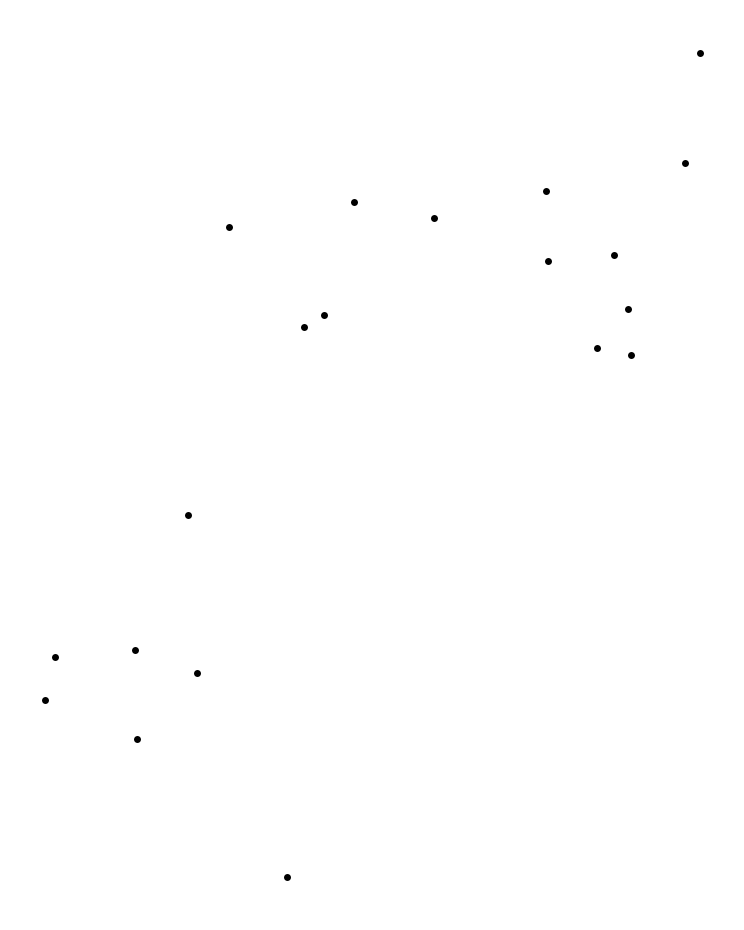

Academic license - for non-commercial use only - expires 2022-08-27
Using license file /Users/vblanco/gurobi.lic


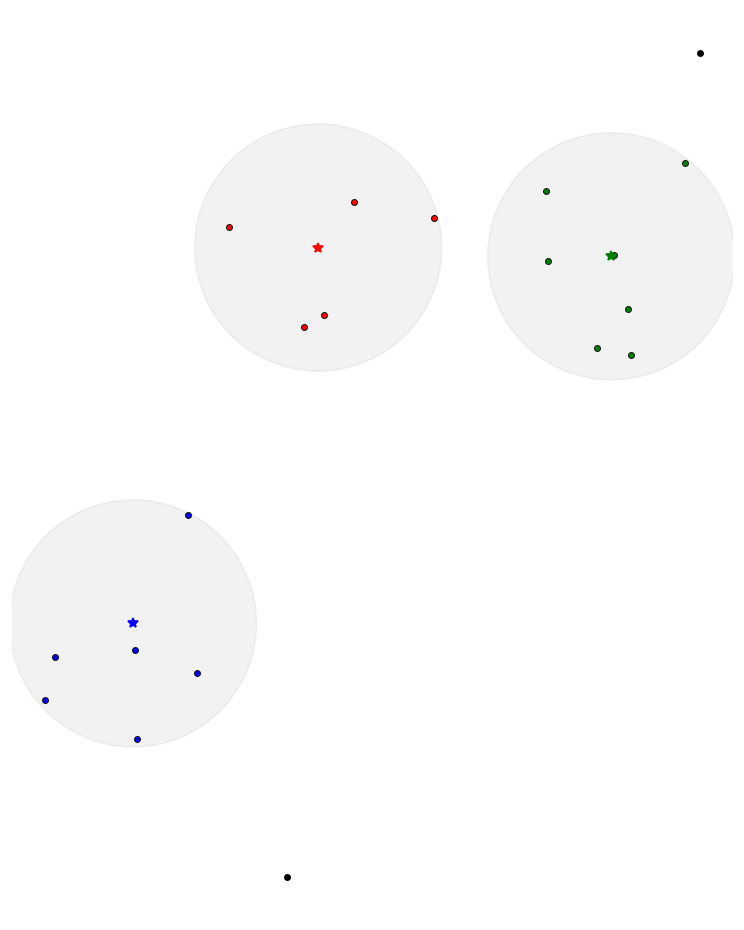

Obj Model 1:  18.0 CPU Time: 0.5763962268829346 secs.


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from mclp import *


p=3

A, b = make_blobs(n_samples=20, centers=3, cluster_std=3)

A=(np.array(A)-np.min(A))/(np.max(A)-np.min(A))
plt.rcParams['figure.dpi'] = 120
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1, 1)
ax.set_aspect('equal')   
ax.axis('off')    
ax.scatter(A[:,0], A[:,1], c='k', s=10)
plt.show()

n=len(A)
R=0.15*np.ones(n)
w=np.ones(n)
dim=2
t1, f1 = mclp(A, w, R, p, dim, draw=1)

## First Formulation (MINLP)

$
z_{ij} =\left\{\begin{array}{cl}
1 & \mbox{if $i$ is covered by facility $X_j$,}\\
0 & \mbox{otherwise}
\end{array}\right.
$

\begin{align*}
&\\
&\\
&\\
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } & \|a_i -X_j\| \leq R_j + M (1-z_{ij}), \forall i \in N, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.\\
&\\
&\\
&\\
\end{align*}

### Reformulating Norm-based constraints

$$d_{ij}: \text{distance from $a_i$ to the $j$th facility} = \|a_i - X_j\|
$$

$$d_{ij} \leq R_j + M(1-z_{ij}), \forall i\in N, j\in P$$

> $\ell_2$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij}^2 \geq \sum_{k=1}^d v_{ijk}^2, 
\end{align*}

> $\ell_1$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij} \geq \sum_{k=1}^d v_{ijk}, 
\end{align*}

> $\ell_{\frac{3}{2}}$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij} \geq \sum_{k=1}^d U_{ijk}, \forall k=1, \ldots, d,\\
v^2_{ijk} \leq W_{ijk} U_{ijk}, \forall k=1, \ldots, d,\\
W^2_{ijk} \leq d_{ij} v_{ijk}, \forall k=1, \ldots, d.
\end{align*}

> $\ell_{3}$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij} \geq \sum_{k=1}^d U_{ijk}, \forall k=1, \ldots, d,\\
v_{ijk}^2 \leq W_{ijk} D_{ij}, \forall k=1, \ldots, d,\\
W^2_{ijk} \leq U_{ijk} v_{ijk}, \forall k=1, \ldots, d.
\end{align*}

> $\ell_{4}$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij} \geq \sum_{k=1}^d U_{ijk}, \forall k=1, \ldots, d,\\
v^2_{ijk} \leq W_{ijk} d_{ij}, \forall k=1, \ldots, d,\\
W^2_{ijk} \leq U_{ijk} d_{ij}, \forall k=1, \ldots, d.
\end{align*}

> $\ell_\infty$-norm:
\begin{align*}
v_{ijk} \geq a_{ik}-X_{jk}, \forall k=1, \ldots, d,\\
v_{ijk} \geq -a_{ik}+X_{jk}, \forall k=1, \ldots, d,\\
d_{ij} \geq \ v_{ijk}, \forall k=1, \ldots, d,
\end{align*}

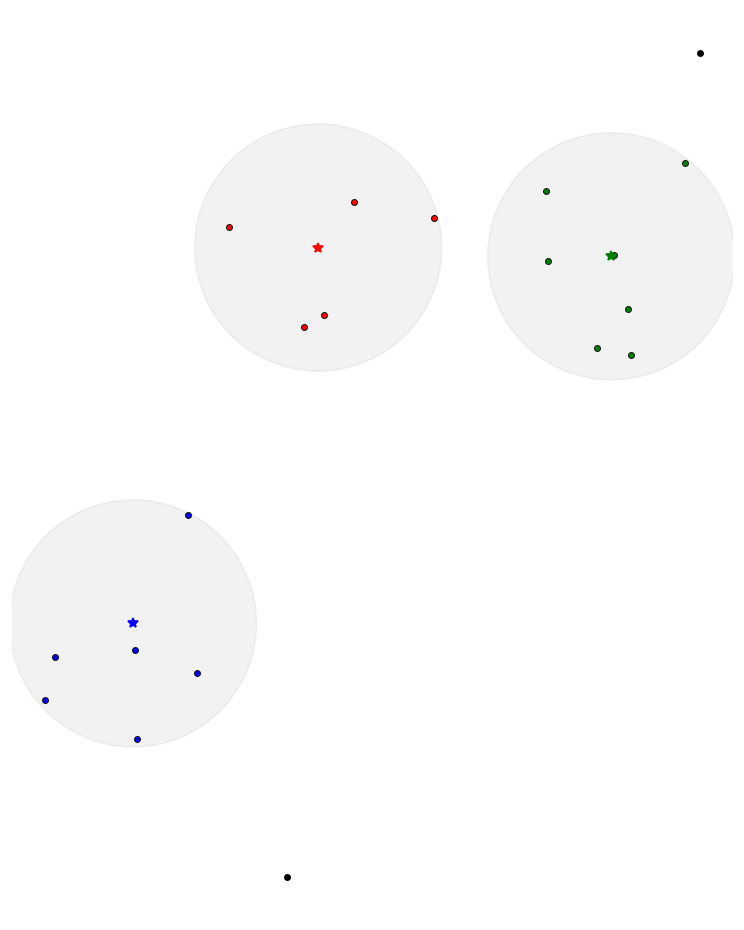

Obj Model 1:  18.0 CPU Time: 0.3614540100097656 secs.
GapRelax: 10.0000%


In [2]:
from gurobipy import *
def MCLP1(A, w, R, p, dim, draw=0):

    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model1 = Model("MCLP")    

    #VARIABLES:
    X=model1.addVars(p,dim, lb=-GRB.INFINITY,  name="X")
    z=model1.addVars(n, p, vtype=GRB.BINARY,  name="z")
    v=model1.addVars(n, p, dim,  name="v")
    d=model1.addVars(n, p,  name="d")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model1.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model1.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )

    ## norm-constraints (Euclidean)

    model1.addConstrs(
        (v[i,j,k]>= A[i,k]-X[j,k] for i in N for j in P for k in D)
        )

    model1.addConstrs(
        (v[i,j,k]>= -A[i,k]+X[j,k] for i in N for j in P for k in D)
        )

    model1.addConstrs(
        (d[i,j]*d[i,j]>= quicksum(v[i,j,k]*v[i,j,k] for k in D) for i in N for j in P), name="Q"
        )
    ## Covering Ctrs:

    bigM=np.max([np.linalg.norm(A[i,:]-A[j,:]) for i in N for j in N])
    model1.addConstrs(
        (d[i,j]<= R[j] + bigM*(1-z[i,j]) for i in N for j in P), name="Cover"
        )

    
    model1.update()
    relax=model1.relax()
    relax.Params.Outputflag=0
    relax.optimize()
    relaxobj=relax.ObjVal
    
    # Optimize:

    model1.Params.Outputflag=0
    model1.Params.TimeLimit=300
    model1.optimize()
    gaprelax=100*(relaxobj-model1.ObjVal)/relaxobj

    ## Results:
    if draw==1:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=10)

        colores=['b','r','g', 'y', 'b', 'r', 'orange']

        for j in P:
            circle = plt.Circle((X[j,0].x, X[j,1].x), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0].x, X[j,1].x, '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    #print(j, i)
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
    
        print("Obj Model 1: ", model1.ObjVal, "CPU Time:", model1.RunTime, "secs.")
        
        print("GapRelax: %.4f%%"%gaprelax)
    return model1.RunTime,  model1.ObjVal, gaprelax

    

Time1, Obj1, GapRelax1 = MCLP1(A, w, R, p, dim, draw=1)

# Second Formulation (Church, 1984)

\begin{align*}
&\\
&\\
&\\
\end{align*}
**Theorem**

The points where the facilities can be located can be restricted to $CIP=\{c_1, \ldots, c_L\}$, the demand points plus the pair-waise intersections of the balls centered at the demand points $A$ and each of the radia.

$\#CIP=O(n^2)$

\begin{align*}
&\\
&\\
&\\
\end{align*}

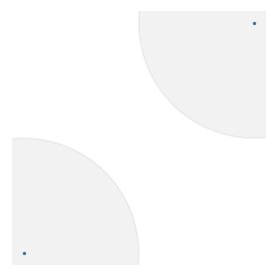

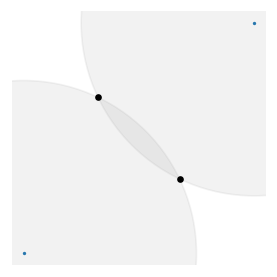

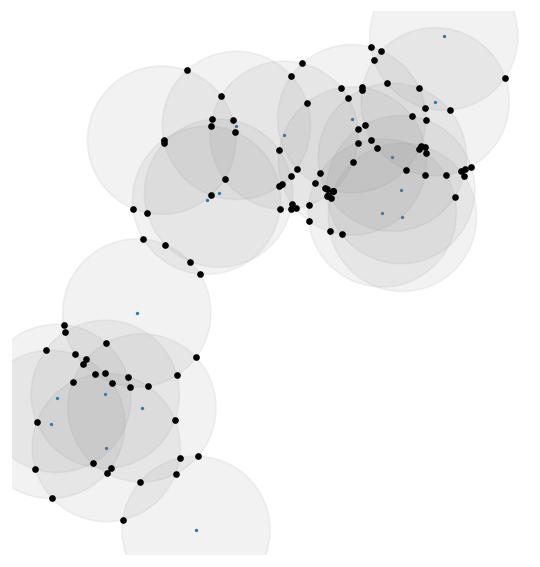

#CIPS:  122 TimeCIPS= 0.09151983261108398


In [3]:
import time

def CIPS(A, R, draw=0, num=0):

    N=range(len(A))
    if draw==1:
        fig = plt.figure(figsize=(6, 6))
        if num==0:
            ax = fig.add_subplot(1,1, 1)
        else: 
            ax = fig.add_subplot(1,2, num)
        ax.set_aspect('equal')   
        ax.axis('off')  
        ax.scatter(A[:,0], A[:,1], s=1)
        for i in N:
            circle = plt.Circle((A[i,0], A[i,1]), R[0], color='gray', alpha=0.1)
            ax.add_artist(circle)
    
    start=time.time()
    r=R[0]


    Ct=[]
    for i1 in N:
        for i2 in range(i1):
            d12=np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2)
            if d12>0.1 and 4*r**2/d12**2 >= 1.0001:
                #print(d12)
                pt1=(0.5*(A[i1,0]+A[i2,0]) + 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A[i2,1]-A[i1,1]),  0.5*(A[i1,1]+A[i2,1]) + 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A[i1,0]-A[i2,0]))
                pt2=(0.5*(A[i1,0]+A[i2,0]) - 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A[i2,1]-A[i1,1]),  0.5*(A[i1,1]+A[i2,1]) - 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A[i1,0]-A[i2,0]))
               
                if draw==1:
                    ax.plot(pt1[0], pt1[1], 'o', ms=3, c='k')
                    ax.plot(pt2[0], pt2[1], 'o', ms=3, c='k')
                if pt1 not in Ct:
                    Ct.append(pt1)
                if pt2 not in Ct:
                    Ct.append(pt2)
    for i in N:
        Ct.append((A[i,0],A[i,1]))
    end=time.time()
    if draw==1:
        plt.show()
    return Ct, end-start


Ct, TimeCIPS= CIPS(np.array([[0,0],[1,1]]), [0.5], draw=1, num=1)

Ct, TimeCIPS= CIPS(np.array([[0,0],[1,1]]), [0.75], draw=1,num=2)
Ct, TimeCIPS= CIPS(A, R, draw=1)
print("#CIPS: ", len(Ct), "TimeCIPS=", TimeCIPS)




$$
y_i = \left\{\begin{array}{cl}
1 & \mbox{if $a_i$ is covered},\\
0 & \mbox{otherwise}
\end{array}\right.
$$
$$
x_l =  \left\{\begin{array}{cl}
1 & \mbox{if $c_l$ is chosen as center},\\
0 & \mbox{otherwise}
\end{array}\right.
$$

\begin{align*}
\max &\sum_{i\in N} w_i y_i\\
\mbox{s.t.} & y_i \leq \sum_{l\in L: \atop a_i \text{ cov  by } c_l} x_l, \forall i \in N,\\
& \sum_{l\in L} x_l = p,\\
&y_i, x_l \in \{0,1\}, \forall i\in N, l\in L.
\end{align*}

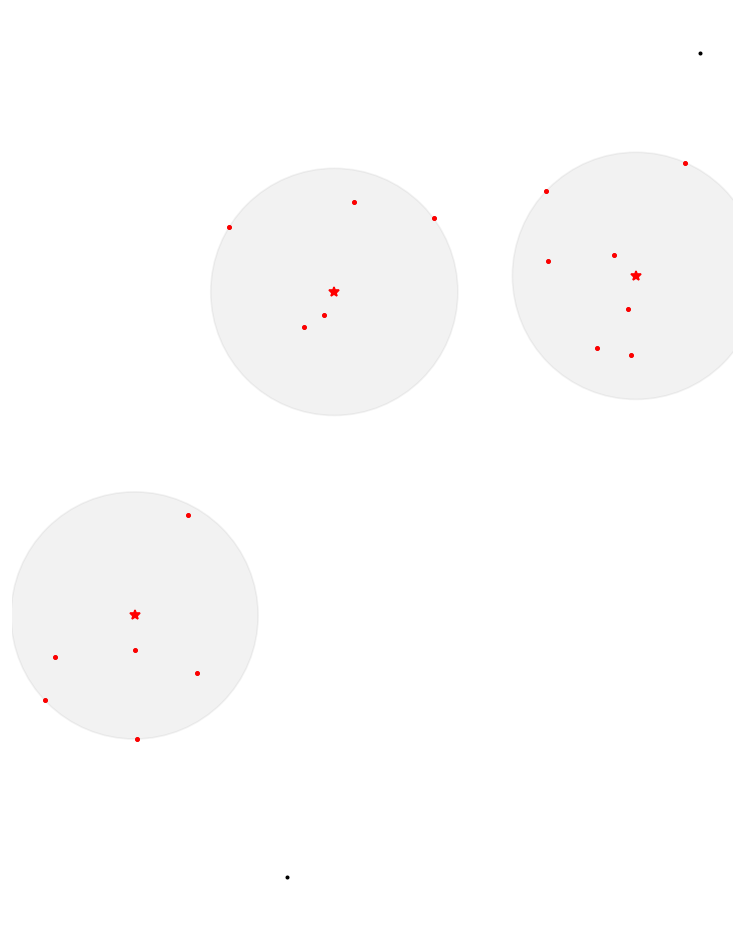

Obj Model 2:  18.0 CPU Time: 0.006792783737182617 secs. GapLPRoot: 0.0
nodes:  0.0


In [4]:
def callback_mclp2(model, where):
        

    if where == GRB.Callback.MIP:
        nodecnt = model.cbGet(GRB.Callback.MIP_NODCNT)
        
        if nodecnt==0:            
            #print("Relax: ", model.cbGet(GRB.Callback.MIP_OBJBND))
            model._lproot=model.cbGet(GRB.Callback.MIP_OBJBND)

def MCLP2(A, w, R, p, dim, Ct, draw=0):
    
    n=len(A)
    l0=len(Ct)
    L=range(l0)
    N=range(n)
    Cov={}
    for i in N:
        Cov[i]=[]
        for l in L:
            if np.sqrt((A[i,0]-Ct[l][0])**2 + (A[i,1]-Ct[l][1])**2) <= R[0]+0.001:
                Cov[i].append(l)

    

    model2= Model("MCLP2")    

    #VARIABLES:
    y=model2.addVars(n ,vtype=GRB.BINARY,  name="y")
    x=model2.addVars(l0 ,vtype=GRB.BINARY,  name="x")

    #OBJ FUNCTION
    obj = quicksum(w[i]*y[i] for i in N)

    model2.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    startload=time.time()
    ##
    model2.addConstrs(
        (y[i] <= quicksum(x[l] for l in Cov[i]) for i in N)
        )
    endload=time.time()
    
    TimeLoad=endload-startload
    
    model2.addConstr( quicksum(x[l] for l in L)== p)

    model2.Params.Outputflag=0
    
    model2._lproot=0
    
    model2.Params.TimeLimit=300
    model2.optimize(callback_mclp2)
    if model2._lproot<=0.0001:
        gaplproot=100
    else:
        gaplproot=100*(model2._lproot- model2.ObjVal)/model2._lproot
    ## Results:
    if draw==1:
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)


        for l in L:
            if x[l].x>0.5:
                circle = plt.Circle((Ct[l][0], Ct[l][1]), R[0], color='gray', alpha=0.1)
                ax.add_artist(circle)
                ax.plot(Ct[l][0], Ct[l][1], '*', color='r')
                for i in N:
                    if l in Cov[i]:
                        ax.plot(A[i,0], A[i,1],  'o', c='r', ms=2)


        plt.show()
    
    

        print("Obj Model 2: ", model2.ObjVal, "CPU Time:", model2.RunTime, "secs.", "GapLPRoot:", gaplproot)
        print("nodes: ", model2.NodeCount)
    return model2.RunTime, gaplproot, model2.ObjVal, TimeLoad
Time2, GapLP2, Obj2, TimeLoad2=MCLP2(A, w, R, p, dim, Ct, draw=1)

In [6]:
dataf0={}
dataf0["n"]=[]
dataf0["p"]=[]
dataf0["r"]=[]
dataf0["Time1"]=[]
dataf0["Time2"]=[]
dataf0["TimeCIPS"]=[]
dataf0["nCIPS"]=[]
dataf0["GapRelax1"]=[]
dataf0["GapRoot2"]=[]
#dataf1["Obj2"]=[]
dataf0["TimeLoad2"]=[]
for nn in [10,15,20]:
    AA=np.random.rand(nn,2)
    
    dim=2
    ww=np.ones(nn)
    #print("*****n=%d"%nn)
    for pp in [2, 5, 10]:
        for rr in [0.1, 0.3, 0.5, 0.7]:
            RR=rr*np.ones(pp)
            



            TTime1, Obj1, GGapRelax1=MCLP1(AA, ww, RR, pp, dim)

            CCt, TTimeCIPS=CIPS(AA,RR)
            TTime2, GGapLP2, Obj2, TTimeLoad2=MCLP2(AA, ww, RR, pp, dim, CCt)
            
            
            dataf0["n"].append(nn)
            dataf0["p"].append(pp)
            dataf0["r"].append(rr)
            dataf0["Time1"].append(TTime1)
            dataf0["GapRelax1"].append(GGapRelax1)
            dataf0["nCIPS"].append(len(CCt))
            dataf0["TimeCIPS"].append(TTimeCIPS)
            dataf0["Time2"].append(TTime2)
            dataf0["GapRoot2"].append(GGapLP2)
            dataf0["TimeLoad2"].append(TTimeLoad2)

from IPython.display import display, HTML
import pandas as pd
df0 = pd.DataFrame(dataf0)

df0['Time1'] = df0['Time1'].map('{:,.2f}'.format)
df0['Time2'] = df0['Time2'].map('{:,.2f}'.format)
df0['GapRelax1'] = df0['GapRelax1'].map('{:,.2f}'.format)
df0['GapRoot2'] = df0['GapRoot2'].map('{:,.2f}'.format)
df0['TimeCIPS'] = df0['TimeCIPS'].map('{:,.2f}'.format)
df0['TimeLoad2'] = df0['TimeLoad2'].map('{:,.2f}'.format)


display(HTML(df0.to_html(index=False)))

n,p,r,Time1,Time2,TimeCIPS,nCIPS,GapRelax1,GapRoot2,TimeLoad2
10,2,0.1,0.27,0.00,0.00,18,50.00,100.00,0.00
10,2,0.3,0.02,0.00,0.00,58,-0.00,100.00,0.00
10,2,0.5,0.02,0.00,0.00,96,-0.00,100.00,0.00
10,2,0.7,0.00,0.00,0.00,98,-0.00,100.00,0.00
10,5,0.1,1.79,0.00,0.00,18,20.00,0.00,0.00
10,5,0.3,0.02,0.00,0.00,58,-0.00,0.00,0.00
10,5,0.5,0.04,0.00,0.00,96,-0.00,100.00,0.00
10,5,0.7,0.01,0.00,0.00,98,-0.00,100.00,0.00
10,10,0.1,0.12,0.00,0.00,18,-0.00,0.00,0.00
10,10,0.3,0.04,0.00,0.00,58,-0.00,100.00,0.00


# Third Formulation

**Note**

Can we characterize the valid $z$ feasible values?




Solutions are _CLUSTERS_ in the form $C_1, \ldots, C_p \subseteq N$ with $C_j \cap C_k = \emptyset$ such  that points in the same cluster must be allowed to be enclosed into a ball of a given radius $R_j$.

Equivalently, for all $j\in P$:

$$
\exists X_j \in \mathbb{R}^d: \|a_{i} - X_j\| \leq R_j, \forall i \in C_j
$$


Or equivalently:

$$
\bigcap_{i\in C_j} \mathbb{B}_{R_j}(a_i) \neq \emptyset
$$
where $\mathbb{B}_R(a)$ is the ball of radius $R$ centered at $a$.





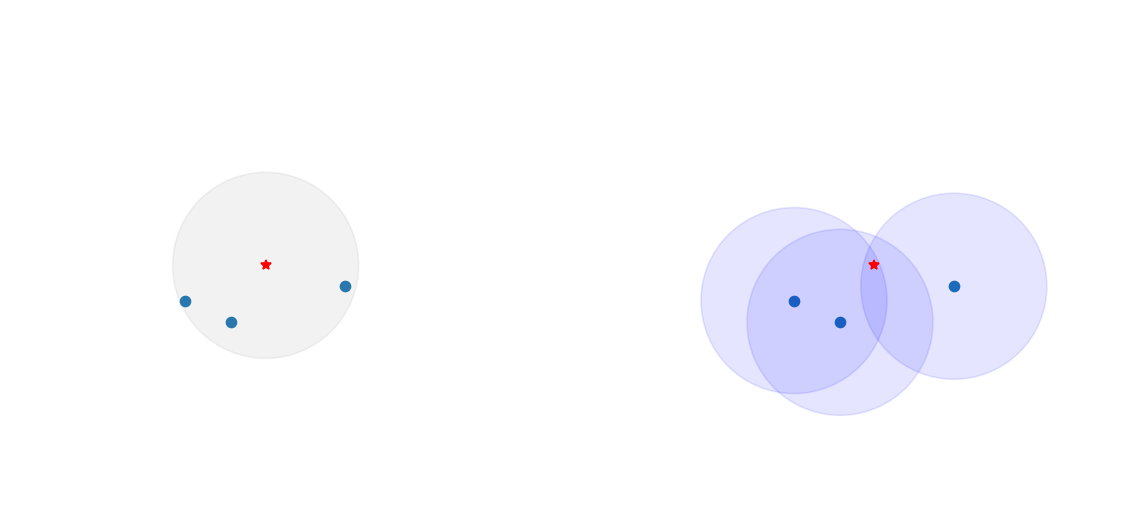

In [7]:
n0=3
A0=np.random.rand(n0,2)

np.random.seed(10001)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(1,2, 1)
ax1.set_aspect('equal')   
ax1.axis('off')  
plt.xlim((-1, 2))  
plt.ylim((-1, 2))  
ax1.scatter(A0[:,0], A0[:,1])
ax1.plot(0.5, 0.5, '*', color="r")
circle = plt.Circle((0.5, 0.5), 0.55, color='gray', alpha=0.1)
ax1.add_artist(circle)




ax2 = fig.add_subplot(1,2,2)
ax2.set_aspect('equal')   
ax2.axis('off')  
plt.xlim((-1, 2))  
plt.ylim((-1, 2))  
ax2.scatter(A0[:,0], A0[:,1])
ax2.plot(0.5, 0.5, '*', color="r")
for i in range(n0):
    circle = plt.Circle((A0[i,0], A0[i,1]), 0.55, color='blue', alpha=0.1)
    ax2.add_artist(circle)
plt.show()

Thus, for a given $j$ it is verified that:
$$
\sum_{i\in C_j} z_{ij} \leq |C_j|-1, \forall C_j \subseteq N: \bigcap_{i\in C_j} \mathbb{B}_{R_j}(a_i)=\emptyset
$$

Conversely, if $z$ verifies te above constraints... One can construct feasible centers to the MCLP.

\begin{align*}
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } & \|a_i -X_j\| \leq R_j + M (1-z_{ij}), \forall i \in N, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.
\end{align*}


Can be replaced by:
    

\begin{align*}
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } & \sum_{i\in C_j} z_{ij} \leq |C_j|-1, \forall C_j \subseteq N: \bigcap_{i\in C_j} \mathbb{B}_{R_j}(a_i)=\emptyset, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.
\end{align*}

Once the problem above is solved, one can obtain the centers by finding:
$$
X_j \in \bigcap_{i \in N: \bar z_{ij}=1} \mathbb{B}_{R_j}(a_i) \neq \emptyset
$$
which can be obtain, e.g., by solving a convex feasibility problem:
\begin{align*}
\min & \;\;0\\
\mbox{s.t. } & \|X_j - a_i\|\leq R_j, \forall i\in N: \bar z_{ij}=1,\\
& X_j \in \mathbb{R}^d
\end{align*}

One could also obtain the centers by solving a 1-center problem at each cluster...


\begin{align*}
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } & \sum_{i\in C_j} z_{ij} \leq |C_j|-1, \forall C_j \subseteq N: \bigcap_{i\in C_j} \mathbb{B}_{R_j}(a_i)=\emptyset, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.
\end{align*}

Exponentially many constraints!!!
Hint 1: Use _Branch-and-Cut_

For each cluster $C_j = \{i \in N: \bar z_{ij}=1\}$:
Solve the 1-center problem:
$$
\rho^*_j = \min_{X\in \mathbb{R}^d} \max_{i\in C_j} \|a_i - X\|
$$
If $\rho^*>R_j$ then, $C_j$ violates the covering constraints.

__Complexity__: The one center problem solvable in poly-time (Meggido, 83; Welzl, 91; Elzinga & Hearn, 72; Chrystal & Peirce, 1882).

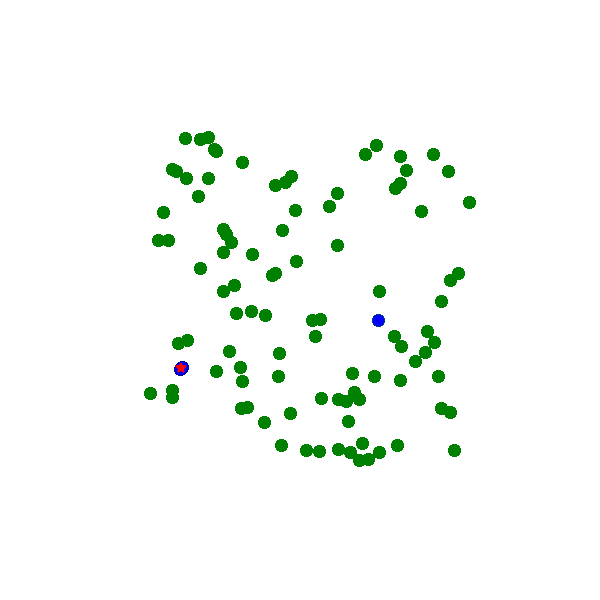

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

In [8]:
import matplotlib.image as mpimg
from EH import *

from IPython.display import Image

Image("1center.gif")

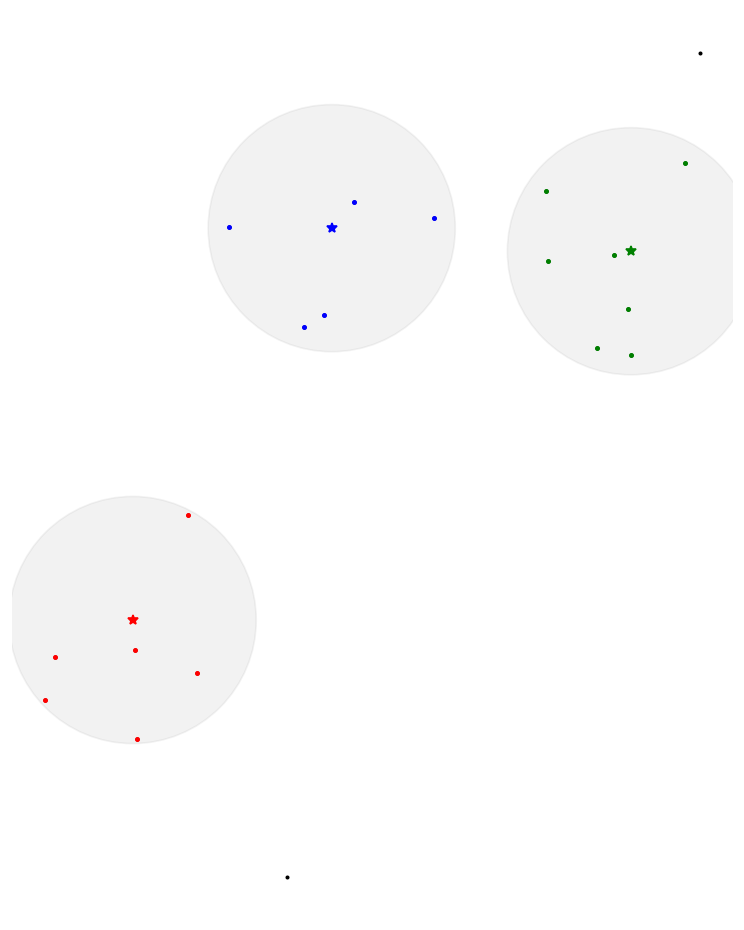

Obj Model 3:  18.0 CPU Time: 0.9268620014190674 secs. GAP_Root:  9.999999999999968 %


(20, 20, 20)

In [9]:
def callback_mclp3(model, where):
        
    if where == GRB.Callback.MIPSOL: 
        
        zsol= model.cbGetSolution(model._z)
        A= model._A
        R = model._R
        p= model._p
        

        N=range(len(A))        
        P=range(p)
        
        #Clusters i the solution:
        
        C=[[i for i in N if zsol[i,j]> 0.5] for j in P]

        # Check Violation:
        for j in P:
            if len(C[j])>=2:
                AA = [Point(A[i,0],A[i,1]) for i in C[j]]
                OC = OneCenterEH(AA)
                if OC.radius > R[j]:
                    for jj in P:
                        model.cbLazy(quicksum(model._z[i,jj] for i in C[j])  <= len(C[j]) - 1)
                        model._ncuts+=1
    if where == GRB.Callback.MIP:
        nodecnt = model.cbGet(GRB.Callback.MIP_NODCNT)
        
        if nodecnt==0:            
            model._lproot=model.cbGet(GRB.Callback.MIP_OBJBND)

def MCLP3(A, w, R, p, dim, draw=0):

    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model3 = Model("MCLP3")    

    #VARIABLES:
    z=model3.addVars(n, p,vtype=GRB.BINARY,  name="z")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model3.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model3.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )
    
    #Callback
    
    model3._z=z
    model3._R = R
    model3._A = A
    model3._p = p
    model3._lproot=n
    model3._ncuts=0
    
    
    
    # Optimize:

    model3.Params.Outputflag=0
    model3.Params.lazyConstraints = 1
    model3.Params.TimeLimit = 300
    model3.optimize(callback_mclp3)

    GapLP3=100*(model3._lproot-model3.ObjVal)/model3._lproot
    Time3=model3.Runtime

    ## Results:
    if draw==1:
        C=[[i for i in N if z[i,j].x> 0.5] for j in P if sum(z[i,j].x for i in N)>=1]
    
        X=np.empty((p,2))
        for j in P:
            AA = [Point(A[i,0],A[i,1]) for i in C[j]]
            OC = OneCenterEH(AA)
            X[j,0]=OC.center.x
            X[j,1]=OC.center.y
        
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)

        colores=['b','r','g']

        for j in P:
            circle = plt.Circle((X[j,0], X[j,1]), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0], X[j,1], '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
        print("Obj Model 3: ", model3.ObjVal, "CPU Time:", model3.RunTime, "secs.", "GAP_Root: ", GapLP3, "%")

    
    
    return Time3, GapLP3, model3.ObjVal, model3._ncuts
    
Time3, GapLP3, Obj3, Cuts3=MCLP3(A, w, R, p, dim, draw=1)
len(A), len(w), len(R)

### Cliques

Let $G=(N,E)$ with $\{i,i'\} \in E$ if $\|a_i - a_{i'}\| > R$.

Then, cliques $Q$ on $G$ provide valid inequalities for MCLP3:

$$
\sum_{i\in Q} z_{ij} \leq 1
$$

149


[[0, 8, 9, 10, 18],
 [0, 3, 9, 10, 18],
 [0, 6, 9, 10, 18],
 [0, 7, 9, 10, 18],
 [1, 9, 10, 18],
 [2, 8, 9, 10, 18],
 [2, 3, 9, 10, 18],
 [2, 6, 9, 10, 18],
 [2, 7, 9, 10, 18],
 [8, 9, 10, 16, 18],
 [3, 9, 10, 16, 18],
 [6, 9, 10, 16, 18],
 [7, 9, 10, 16, 18],
 [6, 9, 10, 17, 18],
 [7, 9, 10, 17, 18],
 [8, 9, 10, 11],
 [3, 9, 10, 11],
 [6, 9, 10, 11],
 [7, 9, 10, 11],
 [3, 9, 10, 12],
 [6, 9, 10, 12],
 [7, 9, 10, 12],
 [1, 9, 10, 13],
 [3, 9, 10, 13],
 [6, 9, 10, 13],
 [7, 9, 10, 13],
 [8, 9, 10, 13],
 [0, 8, 9, 18, 19],
 [0, 3, 9, 18, 19],
 [0, 6, 9, 18, 19],
 [0, 7, 9, 18, 19],
 [1, 9, 18, 19],
 [2, 8, 9, 18, 19],
 [2, 3, 9, 18, 19],
 [2, 6, 9, 18, 19],
 [2, 7, 9, 18, 19],
 [8, 9, 16, 18, 19],
 [3, 9, 16, 18, 19],
 [6, 9, 16, 18, 19],
 [7, 9, 16, 18, 19],
 [6, 9, 17, 18, 19],
 [7, 9, 17, 18, 19],
 [8, 9, 11, 19],
 [3, 9, 11, 19],
 [6, 9, 11, 19],
 [7, 9, 11, 19],
 [3, 9, 12, 19],
 [6, 9, 12, 19],
 [7, 9, 12, 19],
 [1, 9, 13, 19],
 [3, 9, 13, 19],
 [6, 9, 13, 19],
 [7, 9, 13, 19],
 [8

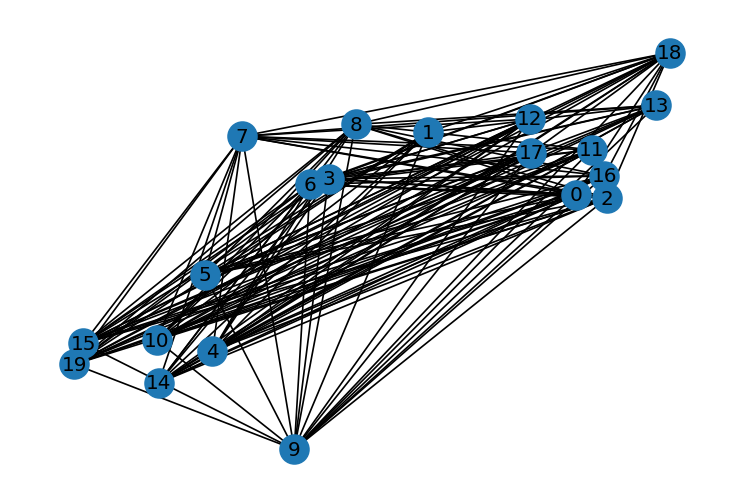

In [10]:
import networkx as nx


N= range(len(A))
G = nx.Graph()
for i in N:
    G.add_node(i)



for i1 in N:
    for i2 in N:
        if i1<i2:
            if np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2) >= 2*R[0]+0.001:
                G.add_edge(i1,i2)
               

pos = {i: (A[i,0], A[i,1]) for i in N}

labels = nx.draw(G, pos=pos, with_labels = True)

Cliques=list(nx.find_cliques(G))
print(len(list(Cliques)))
list(sorted(l) for l in Cliques)

[[0, 2, 11, 12, 13, 16, 17], [1, 3, 6, 7, 8], [4, 5, 10, 14, 15, 19]]


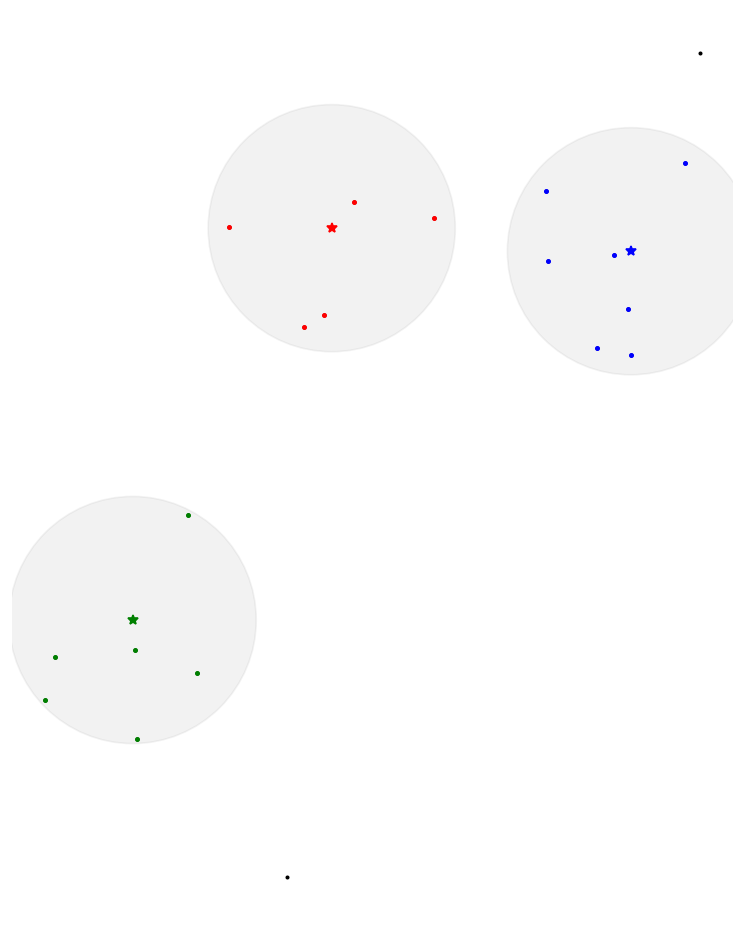

Obj Model 3_Cliques:  18.0 CPU Time: 0.012387990951538086 secs. GAP_Root:  0.0 %
time Cliques:  0.03398013114929199


In [11]:
def MCLP3_Cliques(A, w, R, p, dim, draw=0):

    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model3 = Model("MCLP3")    

    #VARIABLES:
    z=model3.addVars(n, p,vtype=GRB.BINARY,  name="z")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model3.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model3.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )
    
    ###Cliques:
    

    
    N= range(len(A))
    G = nx.Graph()
    for i in N:
        G.add_node(i)

    start=time.time()

    for i1 in N:
        for i2 in N:
            if i1<i2:
                if np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2) >= 2*R[0]+0.01:
                    G.add_edge(i1,i2)

    Cliques=list(nx.find_cliques(G))
    
    model3.addConstrs(
        (quicksum(z[i,j] for i in Cliques[l])<=1 for l in range(len(Cliques)) for i in Cliques[l] for j in P )
        )
    end=time.time()
 
    #Callback
    
    model3._z=z
    model3._R = R
    model3._A = A
    model3._p = p
    model3._lproot=n
    model3._ncuts=0
    
    
    
    # Optimize:

    model3.Params.Outputflag=0
    model3.Params.lazyConstraints = 1
    model3.Params.TimeLimit = 600
    model3.optimize(callback_mclp3)
    
    
    if model3.status==GRB.INFEASIBLE:
        model3.computeIIS()
        model3.write("model3_cliques.ilp")
    
    
    GapLP3=100*(model3._lproot-model3.ObjVal)/model3._lproot
    Time3=model3.Runtime
    Tcliques=end-start
    ## Results:
    if draw==1:
        
        C=[[i for i in N if z[i,j].x> 0.5] for j in P]
        print(C)
        X=np.empty((p,2))
        for j in P:
            if len(C[j])>=2:
                AA = [Point(A[i,0],A[i,1]) for i in C[j]]
                OC = OneCenterEH(AA)
                X[j,0]=OC.center.x
                X[j,1]=OC.center.y
        
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)

        colores=['b','r','g']

        for j in P:
            circle = plt.Circle((X[j,0], X[j,1]), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0], X[j,1], '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
        print("Obj Model 3_Cliques: ", model3.ObjVal, "CPU Time:", model3.RunTime, "secs.", "GAP_Root: ", GapLP3, "%")
        
        print("time Cliques: ", Tcliques)
        
    return Time3, GapLP3, Cliques, model3.ObjVal, model3._ncuts, Tcliques
    
Time3_Cl, GapLP3_Cl, Cliques3, Obj3_Cl, Cuts3_Cl, Tcliques=MCLP3_Cliques(A, w, R, p, dim, draw=1)

In [12]:
dataf1={}
dataf1["n"]=[]
dataf1["p"]=[]
dataf1["r"]=[]

dataf1["Time2"]=[]
dataf1["Time3"]=[]
dataf1["Time3_Cl"]=[]
dataf1["TimeCIPS"]=[]
dataf1["nCIPS"]=[]
dataf1["TimeLoad2"]=[]
dataf1["GapRoot2"]=[]
dataf1["GapRoot3"]=[]
dataf1["GapRoot3_Cl"]=[]
dataf1["Cuts3"]=[]
dataf1["Cuts3_Cl"]=[]
dataf1["TimeCliques"]=[]
#dataf1["Obj2"]=[]



for nn in [15, 20, 30]:
    
    #AA=np.random.rand(nn,2)
    AA, bb = make_blobs(n_samples=nn, cluster_std=1, centers=5, center_box=(0,1))
    AA=(np.array(AA)-np.min(AA))/(np.max(AA)-np.min(AA))
    for pp in [2,5,10]:
        dim=2
        ww=np.ones(nn)
        #print("*****n=%d"%nn)
        for rr in [0.1, 0.3, 0.5]:
            RR=rr*np.ones(pp)
            
            
            CCt, TTimeCIPS=CIPS(AA,RR)
            TTime2, GGapLP2, Obj2, TTimeLoad2=MCLP2(AA, ww, RR, pp, dim, CCt)
            TTime3, GGapLP3, Obj3, Cuts3=MCLP3(AA, ww, RR, pp, dim, CCt)
            TTime3_Cl, GGapLP3_Cl, CCliques, Obj3_Cl, Cuts3_Cl, TT3_Cliques=MCLP3_Cliques(AA, ww, RR, pp, dim, CCt)
            
            dataf1["n"].append(nn)
            dataf1["p"].append(pp)
            dataf1["r"].append(rr)
            dataf1["Time2"].append(TTime2)
            dataf1["GapRoot2"].append(GGapLP2)
            dataf1["TimeLoad2"].append(TTimeLoad2)
            dataf1["Time3"].append(TTime3)
            dataf1["Time3_Cl"].append(TTime3_Cl)
            dataf1["GapRoot3"].append(GGapLP3)
            dataf1["GapRoot3_Cl"].append(GGapLP3_Cl)
            dataf1["nCIPS"].append(len(CCt))
            dataf1["TimeCIPS"].append(TTimeCIPS)
            dataf1["TimeCliques"].append(TT3_Cliques)
            dataf1["Cuts3_Cl"].append(Cuts3_Cl)
            dataf1["Cuts3"].append(Cuts3_Cl)
            

df1 = pd.DataFrame(dataf1)

df1['Time2'] = df1['Time2'].map('{:,.2f}'.format)
df1['Time3'] = df1['Time3'].map('{:,.2f}'.format)
df1['Time3_Cl'] = df1['Time3_Cl'].map('{:,.2f}'.format)
df1['GapRoot2'] = df1['GapRoot2'].map('{:,.2f}'.format)
df1['GapRoot3'] = df1['GapRoot3'].map('{:,.2f}'.format)
df1['GapRoot3_Cl'] = df1['GapRoot3_Cl'].map('{:,.2f}'.format)
df1['TimeCIPS'] = df1['TimeCIPS'].map('{:,.2f}'.format)
df1['TimeLoad2'] = df1['TimeLoad2'].map('{:,.2f}'.format)
df1['TimeCliques'] = df1['TimeCliques'].map('{:,.2f}'.format)

display(HTML(df1.to_html(index=False)))

n,p,r,Time2,Time3,Time3_Cl,TimeCIPS,nCIPS,TimeLoad2,GapRoot2,GapRoot3,GapRoot3_Cl,Cuts3,Cuts3_Cl,TimeCliques
15,2,0.1,0.00,4.05,0.01,0.00,31,0.00,0.00,53.33,0.00,6,6,0.01
15,2,0.3,0.00,0.67,0.00,0.00,169,0.00,0.00,6.67,0.00,0,0,0.00
15,2,0.5,0.00,0.01,0.00,0.00,203,0.00,100.00,0.00,0.00,0,0,0.00
15,5,0.1,0.00,0.40,0.04,0.00,31,0.00,0.00,20.00,7.69,25,25,0.03
15,5,0.3,0.00,0.47,0.00,0.00,169,0.00,0.00,0.00,0.00,0,0,0.00
15,5,0.5,0.00,0.01,0.00,0.00,203,0.00,100.00,0.00,0.00,0,0,0.00
15,10,0.1,0.00,0.36,0.02,0.00,31,0.00,0.00,-0.00,0.00,60,60,0.05
15,10,0.3,0.00,0.86,0.00,0.00,169,0.00,100.00,0.00,0.00,0,0,0.01
15,10,0.5,0.00,0.01,0.00,0.00,203,0.00,100.00,0.00,0.00,0,0,0.00
20,2,0.1,0.00,220.49,0.03,0.00,46,0.00,14.29,70.00,0.00,0,0,0.09


**Hellys Theorem**

Let $S_1, \ldots, S_m \subseteq \mathbb{R}^d$ be convex subsets with $m\geq d+1$. Then, $\bigcap_{j=1}^m S_j\neq \emptyset$ if and only if $S_{j_1} \cap \cdots \cap S_{j_d+1} \neq \emptyset$ for all $\{j_1, \ldots, j_d+1\} \subset \{1, \ldots m\}$.


_Planar Case:_

$$
\bigcap_{j=1}^m S_j\neq \emptyset \text{ iff }S_{j_1} \cap S_{j_2} \cap S_{j_3} \neq \emptyset, \forall \{j_1, j_2, j_3\} \subset \{1, \ldots m\}
$$


Thus, checking whether $\bigcap_{i \in S} \mathbb{B}_R(a_i) = 0$ for $S \subset N$ is equivalent to:

1. $\mathbb{B}_R(a_{i_1}) \cap \mathbb{B}_R(a_{i_2}) = \emptyset$, in whose case:
$$
z_{i_1j}+z_{i_2j} \leq 1, \forall j \in P.
$$
2. $\mathbb{B}_R(a_{i_1}) \cap \mathbb{B}_R(a_{i_2}) \cap \mathbb{B}_R(a_{i_3}) = \emptyset$, in whose case:
$$
z_{i_1j}+z_{i_2j}+z_{i_3j} \leq 2, \forall j \in P.
$$

\begin{align*}
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } & \sum_{i\in C_j} z_{ij} \leq |C_j|-1, \forall C_j \subseteq N: \bigcap_{i\in C_j} \mathbb{B}_{R_j}(a_i)=\emptyset, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.
\end{align*}

is equivalent to:
    
\begin{align*}
max &\sum_{j\in P} \sum_{i\in N} \omega_i z_{ij} \\
\mbox{s.t. } &z_{i_1j}+z_{i_2j} \leq 1, \forall i_1, i_2: \mathbb{B}_R(a_{i_1}) \cap \mathbb{B}_R(a_{i_2}) = \emptyset, j\in P,\\
    & z_{i_1j}+z_{i_2j}+z_{i_3j} \leq 2, \forall i_1, i_2, i_3: \mathbb{B}_R(a_{i_1}) \cap \mathbb{B}_R(a_{i_2}) \cap \mathbb{B}_R(a_{i_3}) = \emptyset, j\in P,\\
& \sum_{j\in P} z_{ij} \leq 1, \forall j\in P,\\
& z_{ij} \in \{0,1\}, \forall i\in N, j\in P.
\end{align*}

which has polynomially many constraints (worst (rarely) case $O(n^3)$).

In [13]:

def IntersectionsTwoAndThree(A0, r):
    
    n=len(A0)
    N=range(n)


    listpairs=[]
    for i1 in N:
        for i2 in range(i1):
            d12=np.sqrt((A0[i1,0]-A0[i2,0])**2 + (A0[i1,1]-A0[i2,1])**2)
            if d12>= 2*r+0.001:
                listpairs.append([i1,i2])
    listtriples=[]
    for i1 in N:
        for i2 in N:
             if [i1,i2] not in listpairs:
                for i3 in N:
                    if i1<i2 and i2<i3:
                        if [i1,i3] not in listpairs and [i2,i3] not in listpairs:
                            d12=np.sqrt((A0[i1,0]-A0[i2,0])**2 + (A0[i1,1]-A0[i2,1])**2)
                            d13=np.sqrt((A0[i1,0]-A0[i3,0])**2 + (A0[i1,1]-A0[i3,1])**2)
                            d23=np.sqrt((A0[i3,0]-A0[i2,0])**2 + (A0[i3,1]-A0[i2,1])**2)
                            if d12>=0.01 and 4*r**2/d12**2 - 1>=0.001:                        
                                 #Int(1,2) en 3
                                B1=[0.5*(A0[i1,0]+A0[i2,0]) + 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A0[i2,1]-A0[i1,1]),  0.5*(A0[i1,1]+A0[i2,1]) + 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A0[i1,0]-A0[i2,0])]
                                B2=[0.5*(A0[i1,0]+A0[i2,0]) - 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A0[i2,1]-A0[i1,1]),  0.5*(A0[i1,1]+A0[i2,1]) - 0.5*np.sqrt(4*r**2/d12**2 - 1)*(A0[i1,0]-A0[i2,0])]
                                D12_30=np.sqrt((A0[i3,0]-B1[0])**2 + (A0[i3,1]-B1[1])**2)
                                D12_31=np.sqrt((A0[i3,0]-B2[0])**2 + (A0[i3,1]-B2[1])**2)
                                if  D12_30>=r+0.001 and D12_31>=r+0.001:
                                    if d13>=0.01 and 4*r**2/d13**2 - 1>=0.001:
                                       #Int(1,3) in 2
                                        B1 =[0.5*(A0[i1,0]+A0[i3,0]) + 0.5*np.sqrt(4*r**2/d13**2 - 1)*(A0[i3,1]-A0[i1,1]),  0.5*(A0[i1,1]+A0[i3,1]) + 0.5*np.sqrt(4*r**2/d13**2 - 1)*(A0[i1,0]-A0[i3,0])]
                                        B2 =[0.5*(A0[i1,0]+A0[i3,0]) - 0.5*np.sqrt(4*r**2/d13**2 - 1)*(A0[i3,1]-A0[i1,1]),   0.5*(A0[i1,1]+A0[i3,1])  - 0.5*np.sqrt(4*r**2/d13**2 - 1)*(A0[i1,0]-A0[i3,0])]
                                        D13_20=np.sqrt((A0[i2,0]-B1[0])**2 + (A0[i2,1]-B1[1])**2)
                                        D13_21=np.sqrt((A0[i2,0]-B2[0])**2 + (A0[i2,1]-B2[1])**2)
                                        if D13_20>=r+0.001 and D13_21>=r+0.001:
                                            if d23>=0.01 and 4*r**2/d23**2 - 1>=0.001:
                                                #Int(2,3) in 1
                                                B1=[0.5*(A0[i3,0]+A0[i2,0]) + 0.5*np.sqrt(4*r**2/d23**2 - 1)*(A0[i2,1]-A0[i3,1]),  0.5*(A0[i3,1]+A0[i2,1]) + 0.5*np.sqrt(4*r**2/d23**2 - 1)*(A0[i3,0]-A0[i2,0])]
                                                B2=[0.5*(A0[i3,0]+A0[i2,0]) - 0.5*np.sqrt(4*r**2/d23**2 - 1)*(A0[i2,1]-A0[i3,1]),  0.5*(A0[i3,1]+A0[i2,1]) - 0.5*np.sqrt(4*r**2/d23**2 - 1)*(A0[i3,0]-A0[i2,0])]
                                                D23_10=np.sqrt((A0[i1,0]-B1[0])**2 + (A0[i1,1]-B1[1])**2)
                                                D23_11=np.sqrt((A0[i1,0]-B2[0])**2 + (A0[i1,1]-B2[1])**2)
                                                if D23_10>=r+0.001 and D23_11>=r+0.001:
                                                    listtriples.append([i1,i2,i3])

    return listpairs, listtriples


Pairs, Triples=IntersectionsTwoAndThree(A, R[0])
print("Pairs: ", len(Pairs), "Triplets: ", len(Triples))

Pairs:  128 Triplets:  0


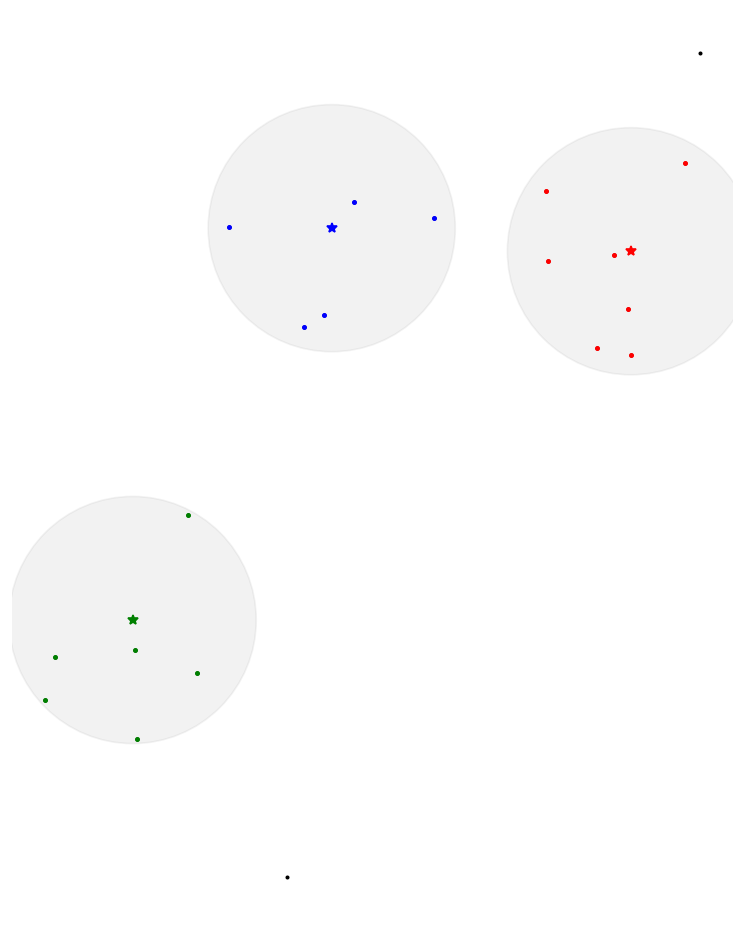

Obj Model 4:  18.0 CPU Time: 0.00634002685546875 secs. GAP_Root:  0.0 %


In [14]:
def callback_mclp4(model, where):
        
    if where == GRB.Callback.MIP:
        nodecnt = model.cbGet(GRB.Callback.MIP_NODCNT)
        
        if nodecnt==0:            
            model._lproot=model.cbGet(GRB.Callback.MIP_OBJBND)

def MCLP4(A, w, R, p, dim, draw=0):
    
    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model4 = Model("MCLP4")    

    #VARIABLES:
    z=model4.addVars(n, p,vtype=GRB.BINARY,  name="z")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model4.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model4.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )
    
    start=time.time()
    ##Cov Constraints (Helly's):
    Pairs, Triplets= IntersectionsTwoAndThree(A, R[0])
    for [i1,i2] in Pairs:
            model4.addConstrs( (z[i1,j]+z[i2,j]<=1 for j in P))

    for [i1,i2,i3] in Triplets:
        model4.addConstrs( (z[i1,j]+z[i2,j]+z[i3,j]<=2 for j in P))

    
    end=time.time()
    #print(len(Pairs), len(Triplets))
    TimeCtrs4=end-start
    #Callback
    
    model4._lproot=0
    
    
    
    # Optimize:

    model4.Params.Outputflag=0
    model4.Params.TimeLimit = 300
    model4.optimize(callback_mclp4)
    if model4._lproot<0.001:
        GapLP4=100
    else:
        GapLP4=100*(model4._lproot-model4.ObjVal)/model4._lproot
    Time4=model4.Runtime

    ## Results:
    if draw==1:
        C=[[i for i in N if z[i,j].x> 0.5] for j in P]
        
    
        X=np.empty((p,2))
        for j in P:
            AA = [Point(A[i,0],A[i,1]) for i in C[j]]
            OC = OneCenterEH(AA)
            X[j,0]=OC.center.x
            X[j,1]=OC.center.y
        
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)

        colores=['b','r','g']

        for j in P:
            circle = plt.Circle((X[j,0], X[j,1]), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0], X[j,1], '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
        print("Obj Model 4: ", model4.ObjVal, "CPU Time:", model4.RunTime, "secs.", "GAP_Root: ", GapLP4, "%")
    
    
    
    return Time4, GapLP4, TimeCtrs4, model4.ObjVal, p*len(Pairs), p*len(Triplets)

Time4, GapLP4, TimeCtrs4, Obj4, Ctr2, Ctr3=MCLP4(A, w, R, p, dim, draw=1)


In [16]:
dataf3={}
dataf3["n"]=[]
dataf3["p"]=[]
dataf3["r"]=[]
dataf3["Time2"]=[]
dataf3["Time4"]=[]
dataf3["TimeCIPS"]=[]
dataf3["nCIPS"]=[]
dataf3["TimeLoad2"]=[]
dataf3["TimeCtrs4"]=[]
dataf3["GapRoot2"]=[]
dataf3["GapRoot4"]=[]
#dataf3["Obj2"]=[]

dataf3["CtrPairs"]=[]
dataf3["CtrTriples"]=[]
for nn in [30]:
    AA=np.random.rand(nn,2)
    
    dim=2
    ww=np.ones(nn)
    #print("*****n=%d"%nn)
    for pp in [2, 5, 10]:
        for rr in [0.1, 0.3, 0.5]:
            RR=rr*np.ones(p)
            



            #TTime1, Obj1=MCLP1(AA, ww, RR, pp, dim)

            CCt, TTimeCIPS=CIPS(AA,RR)
            TTime2, GGapLP2, Obj2, TTimeLoad2=MCLP2(AA, ww, RR, pp, dim, CCt)
            TTime4, GGapLP4, TTimeCtrs4, Obj4, Ctr2, Ctr3=MCLP4(AA, ww, RR, pp, dim)
            
            
            
            dataf3["n"].append(nn)
            dataf3["p"].append(pp)
            dataf3["r"].append(rr)
            dataf3["Time2"].append(TTime2)
            dataf3["TimeLoad2"].append(TTimeLoad2)
            dataf3["GapRoot2"].append(GGapLP2)
            #dataf3["Obj2"].append(Obj2)
            dataf3["nCIPS"].append(len(CCt))
            dataf3["TimeCIPS"].append(TTimeCIPS)
            dataf3["Time4"].append(TTime4)
            dataf3["TimeCtrs4"].append(TTimeCtrs4)
            dataf3["GapRoot4"].append(GGapLP4)
            #dataf1["Obj4"].append(Obj4)
            dataf3["CtrPairs"].append(Ctr2)
            dataf3["CtrTriples"].append(Ctr3)


df3 = pd.DataFrame(dataf3)

df3['Time2'] = df3['Time2'].map('{:,.2f}'.format)
df3['TimeLoad2'] = df3['TimeLoad2'].map('{:,.2f}'.format)
df3['Time4'] = df3['Time4'].map('{:,.2f}'.format)
df3['GapRoot2'] = df3['GapRoot2'].map('{:,.2f}'.format)
df3['GapRoot4'] = df3['GapRoot4'].map('{:,.2f}'.format)
df3['TimeCIPS'] = df3['TimeCIPS'].map('{:,.2f}'.format)


display(HTML(df3.to_html(index=False)))

n,p,r,Time2,Time4,TimeCIPS,nCIPS,TimeLoad2,TimeCtrs4,GapRoot2,GapRoot4,CtrPairs,CtrTriples
30,2,0.1,0.00,0.01,0.01,76,0.00,0.161582,0.00,0.00,794,0
30,2,0.3,0.00,0.02,0.01,502,0.00,0.154599,0.00,4.55,364,50
30,2,0.5,0.01,0.00,0.02,844,0.04,0.167733,0.00,0.00,26,66
30,5,0.1,0.00,0.03,0.00,76,0.00,0.159102,0.00,0.00,1985,0
30,5,0.3,0.00,0.01,0.01,502,0.00,0.148257,0.00,0.00,910,125
30,5,0.5,0.01,0.00,0.02,844,0.01,0.131017,0.00,0.00,65,165
30,10,0.1,0.00,0.07,0.00,76,0.00,0.189237,0.00,0.00,3970,0
30,10,0.3,0.00,0.01,0.01,502,0.00,0.183553,0.00,0.00,1820,250
30,10,0.5,0.00,0.00,0.02,844,0.01,0.139909,100.00,0.00,130,330


In [17]:
display(HTML(df3.to_html(index=False)))

n,p,r,Time2,Time4,TimeCIPS,nCIPS,TimeLoad2,TimeCtrs4,GapRoot2,GapRoot4,CtrPairs,CtrTriples
30,2,0.1,0.00,0.01,0.01,76,0.00,0.161582,0.00,0.00,794,0
30,2,0.3,0.00,0.02,0.01,502,0.00,0.154599,0.00,4.55,364,50
30,2,0.5,0.01,0.00,0.02,844,0.04,0.167733,0.00,0.00,26,66
30,5,0.1,0.00,0.03,0.00,76,0.00,0.159102,0.00,0.00,1985,0
30,5,0.3,0.00,0.01,0.01,502,0.00,0.148257,0.00,0.00,910,125
30,5,0.5,0.01,0.00,0.02,844,0.01,0.131017,0.00,0.00,65,165
30,10,0.1,0.00,0.07,0.00,76,0.00,0.189237,0.00,0.00,3970,0
30,10,0.3,0.00,0.01,0.01,502,0.00,0.183553,0.00,0.00,1820,250
30,10,0.5,0.00,0.00,0.02,844,0.01,0.139909,100.00,0.00,130,330


## Three-wise constraints in a Branch-and-Cut

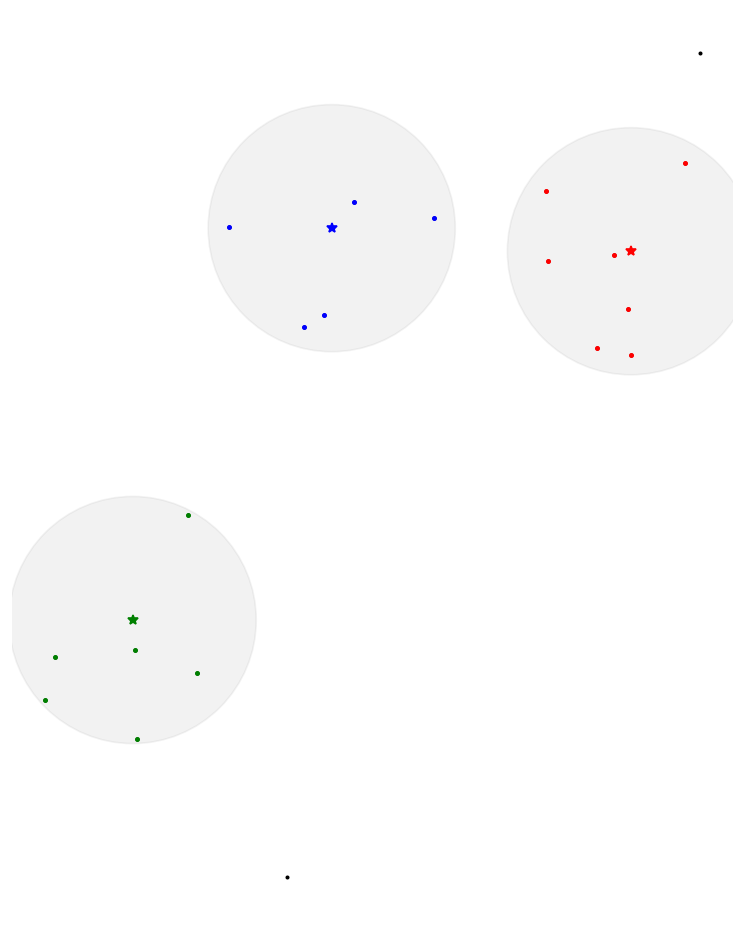

Obj Model 4:  18.0 CPU Time: 0.009923934936523438 secs. GAP_Root:  0.0 %
Cuts:  0 Ctr2: 128


In [18]:
def callback_mclp4_1(model, where):
        
    if where == GRB.Callback.MIPSOL: 
        
        best=model.cbGet(GRB.Callback.MIPSOL_OBJBST)

        zsol= model.cbGetSolution(model._z)
        A= model._A
        R = model._R
        p= model._p
        

        N=range(len(A))        
        P=range(p)
        
        #Clusters i the solution:
        
        C=[[i for i in N if zsol[i,j]> 0.5] for j in P]

        # Check Violation:
        for j in P:
            if len(C[j])>=2:
                AA = [Point(A[i,0],A[i,1]) for i in C[j]]
                OC = OneCenterEH(AA)
                if OC.radius >= R[j]+0.0001:
                    for jj in P:
                        model.cbLazy(quicksum(model._z[i,jj] for i in C[j])  <= len(C[j]) - 1)
                        model._ncuts+=1
                        
                        
    if where == GRB.Callback.MIP:
        nodecnt = model.cbGet(GRB.Callback.MIP_NODCNT)
        
        if nodecnt==0:            
            model._lproot=model.cbGet(GRB.Callback.MIP_OBJBND)




def MCLP4_BandC(A, w, R, p, dim, draw=0):
    
    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model4 = Model("MCLP4_BC")    

    #VARIABLES:
    z=model4.addVars(n, p,vtype=GRB.BINARY,  name="z")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model4.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model4.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )
    
    start=time.time()
    ##Cov Constraints (Helly's):
    Ctr2=0
    for i1 in N:
        for i2 in range(i1):
            if np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2)>=2*R[0]+0.00001:
                model4.addConstrs( (z[i1,j]+z[i2,j]<=1 for j in P), name="C[%d,%d]"%(i1,i2))
                Ctr2+=1

    
    end=time.time()


    
    
    #print(len(Pairs), len(Triplets))
    TimeCtrs4=end-start
    #Callback
    model4._A=A
    model4._p=p
    model4._R=R
    model4._z=z
    model4._lproot=0
    model4._ncuts=0

    
    
    # Optimize:

    model4.Params.Outputflag=0
    model4.Params.TimeLimit = 300
    model4.Params.Lazyconstraints = 1
    
    
    
    
    model4.optimize(callback_mclp4_1)

    if model4._lproot<0.001:
        GapLP4=100
    else:
        GapLP4=100*(model4._lproot-model4.ObjVal)/model4._lproot
    Time4=model4.Runtime

    ## Results:
    if draw==1:
        C=[[i for i in N if z[i,j].x> 0.5] for j in P]
        
    
        X=np.empty((p,2))
        for j in P:
            AA = [Point(A[i,0],A[i,1]) for i in C[j]]
            OC = OneCenterEH(AA)
            X[j,0]=OC.center.x
            X[j,1]=OC.center.y
        
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)

        colores=['b','r','g']

        for j in P:
            circle = plt.Circle((X[j,0], X[j,1]), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0], X[j,1], '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
        print("Obj Model 4: ", model4.ObjVal, "CPU Time:", model4.RunTime, "secs.", "GAP_Root: ", GapLP4, "%")
        print("Cuts: ", model4._ncuts, "Ctr2:", Ctr2)
    
    
    return Time4, GapLP4, TimeCtrs4, model4.ObjVal, Ctr2, model4._ncuts

Time4, GapLP4, TimeCtrs4, Obj4, Ctr2, Cuts=MCLP4_BandC(A, w, R, p, dim, draw=1)


In [30]:
dataf4={}
dataf4["n"]=[]
dataf4["p"]=[]
dataf4["r"]=[]
dataf4["Time2"]=[]
dataf4["Time4"]=[]
dataf4["Time4_BandC"]=[]
dataf4["TimeCIPS"]=[]
dataf4["nCIPS"]=[]
dataf4["TimeCtrs4"]=[]
dataf4["TimeCtrs4_BandC"]=[]
dataf4["GapRoot2"]=[]
dataf4["GapRoot4"]=[]
dataf4["GapRoot4_BandC"]=[]
dataf4["Cuts_BandC"]=[]
dataf4["CtrPairs"]=[]
dataf4["CtrTriples"]=[]
for nn in [50, 100]:
    AA=np.random.rand(nn,2)
    
    dim=2
    ww=np.ones(nn)
    #print("*****n=%d"%nn)
    for pp in [2, 5, 10]:
        for rr in [0.1, 0.3, 0.5]:
            RR=rr*np.ones(pp)
            



            #TTime1, Obj1=MCLP1(AA, ww, RR, pp, dim)

            CCt, TTimeCIPS=CIPS(AA,RR)
            TTime2, GGapLP2, Obj2, GGapLP2=MCLP2(AA, ww, RR, pp, dim, CCt)
            TTime4, GGapLP4, TTimeCtrs4, Obj4, Ctr2, Ctr3=MCLP4(AA, ww, RR, pp, dim)
            TTime4_B, GGapLP4_B, TTimeCtrs4_B, Obj4_B, Ctr2_B, Cuts_B=MCLP4_BandC(AA, ww, RR, pp, dim)
            
            
            dataf4["n"].append(nn)
            dataf4["p"].append(pp)
            dataf4["r"].append(rr)
            dataf4["Time2"].append(TTime2)
            dataf4["GapRoot2"].append(GGapLP2)
            #dataf3["Obj2"].append(Obj2)
            dataf4["nCIPS"].append(len(CCt))
            dataf4["TimeCIPS"].append(TTimeCIPS)
            dataf4["Time4"].append(TTime4)
            dataf4["Time4_BandC"].append(TTime4_B)
            dataf4["TimeCtrs4"].append(TTimeCtrs4)
            dataf4["TimeCtrs4_BandC"].append(TTimeCtrs4_B)
            dataf4["GapRoot4"].append(GGapLP4)
            dataf4["GapRoot4_BandC"].append(GGapLP4_B)
            #dataf1["Obj4"].append(Obj4)
            dataf4["Cuts_BandC"].append(Cuts_B)
            dataf4["CtrPairs"].append(Ctr2)
            dataf4["CtrTriples"].append(Ctr3)
        

df4 = pd.DataFrame(dataf4)

df4['Time2'] = df4['Time2'].map('{:,.2f}'.format)
df4['Time4'] = df4['Time4'].map('{:,.2f}'.format)
df4['GapRoot2'] = df4['GapRoot2'].map('{:,.2f}'.format)
df4['GapRoot4'] = df4['GapRoot4'].map('{:,.2f}'.format)
df4['GapRoot4_BandC'] = df4['GapRoot4_BandC'].map('{:,.2f}'.format)
df4['TimeCIPS'] = df4['TimeCIPS'].map('{:,.2f}'.format)
df4['Time4_BandC'] = df4['Time4_BandC'].map('{:,.2f}'.format)


display(HTML(df4.to_html(index=False)))

n,p,r,Time2,Time4,Time4_BandC,TimeCIPS,nCIPS,TimeCtrs4,TimeCtrs4_BandC,GapRoot2,GapRoot4,GapRoot4_BandC,Cuts_BandC,CtrPairs,CtrTriples
50,2,0.1,0.00,0.03,0.03,0.01,240,1.711528,0.041191,0.00,0.00,0.00,16,2196,12
50,2,0.3,0.01,0.12,0.06,0.06,1568,1.207730,0.049908,0.02,0.00,0.00,22,866,384
50,2,0.5,0.06,0.00,0.31,0.13,2398,0.755782,0.004355,0.04,0.00,0.00,558,40,132
50,5,0.1,0.00,0.35,0.57,0.01,240,2.311307,0.083854,0.00,0.00,0.00,55,5490,30
50,5,0.3,0.03,0.04,0.05,0.07,1568,1.154069,0.050744,0.02,0.00,0.00,45,2165,960
50,5,0.5,0.06,0.00,300.04,0.16,2398,0.829942,0.006729,0.05,0.00,28.00,23705,100,330
50,10,0.1,0.00,2.93,47.68,0.01,240,1.711259,0.223471,0.00,0.00,2.44,100,10980,60
50,10,0.3,0.00,0.06,0.06,0.07,1568,1.204181,0.078396,0.02,0.00,0.00,80,4330,1920
50,10,0.5,0.00,0.00,0.04,0.12,2398,0.721796,0.006522,0.04,0.00,-0.00,220,200,660
100,2,0.1,0.01,0.30,0.29,0.03,842,48.165876,0.179395,0.01,0.00,0.00,16,8860,94


In [31]:
display(HTML(df4.to_html(index=False)))

n,p,r,Time2,Time4,Time4_BandC,TimeCIPS,nCIPS,TimeCtrs4,TimeCtrs4_BandC,GapRoot2,GapRoot4,GapRoot4_BandC,Cuts_BandC,CtrPairs,CtrTriples
50,2,0.1,0.00,0.03,0.03,0.01,240,1.711528,0.041191,0.00,0.00,0.00,16,2196,12
50,2,0.3,0.01,0.12,0.06,0.06,1568,1.207730,0.049908,0.02,0.00,0.00,22,866,384
50,2,0.5,0.06,0.00,0.31,0.13,2398,0.755782,0.004355,0.04,0.00,0.00,558,40,132
50,5,0.1,0.00,0.35,0.57,0.01,240,2.311307,0.083854,0.00,0.00,0.00,55,5490,30
50,5,0.3,0.03,0.04,0.05,0.07,1568,1.154069,0.050744,0.02,0.00,0.00,45,2165,960
50,5,0.5,0.06,0.00,300.04,0.16,2398,0.829942,0.006729,0.05,0.00,28.00,23705,100,330
50,10,0.1,0.00,2.93,47.68,0.01,240,1.711259,0.223471,0.00,0.00,2.44,100,10980,60
50,10,0.3,0.00,0.06,0.06,0.07,1568,1.204181,0.078396,0.02,0.00,0.00,80,4330,1920
50,10,0.5,0.00,0.00,0.04,0.12,2398,0.721796,0.006522,0.04,0.00,-0.00,220,200,660
100,2,0.1,0.01,0.30,0.29,0.03,842,48.165876,0.179395,0.01,0.00,0.00,16,8860,94


## Streghtening the formulations


1. Initialize the pool of three-wise constraints to a non-empty set...
    1. Construct p clusters (k-mean) and run Elzinga-Hearn until the covering radius is achived: Output the 2/3 points defining the disk and incorporate the constraints to the pool.
    2. Compute at each cluster the max cliques of the non-intersection graph: add constraints in the form:
    $$
    \sum_{i \in MAXCLIQUE} z_{ij} \leq 1, \forall j \in P
    $$
2. Break symmetries:
$$
\sum_{i \in N} z_{ij} \leq \sum_{i\in N} z_{i j+1}, for j=1, \ldots, p-1
$$
3. Use Elzinga-Hearn to genrate three-wise constraints. 

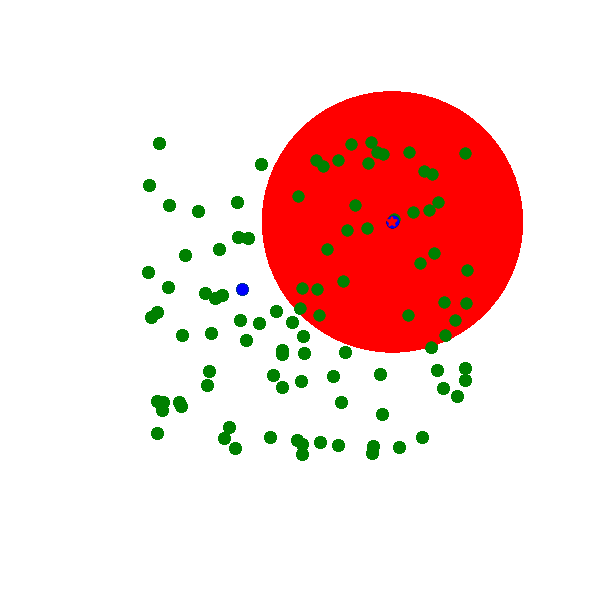

In [20]:
Image("1center_2.gif")

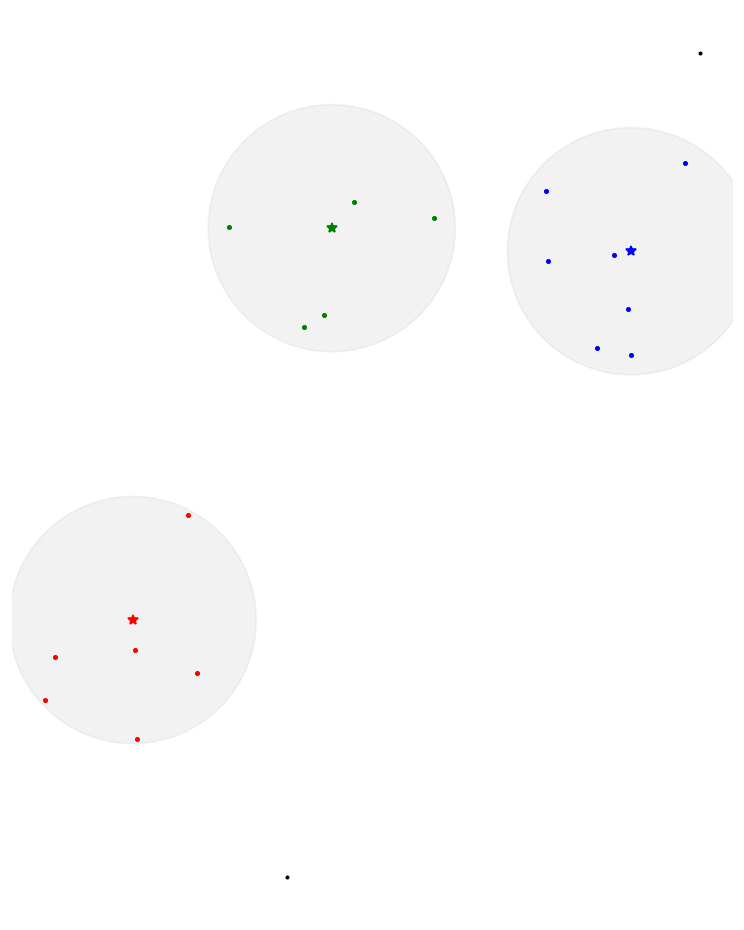

Obj Model 4:  18.0 CPU Time: 0.030726194381713867 secs. GAP_Root:  0.0 %
Cuts:  0 Ctr2: 128


In [32]:
from sklearn.cluster import KMeans
import time

def MCLP4_BandC2(A, w, R, p, dim, draw=0):
    
    n=len(A)
    P=range(p)
    N=range(n)
    D=range(dim)

    model4 = Model("MCLP4_BC")    

    #VARIABLES:
    z=model4.addVars(n, p,vtype=GRB.BINARY,  name="z")

    #OBJ FUNCTION
    obj = quicksum(w[i]*z[i,j] for i in N for j in P)

    model4.setObjective(obj, GRB.MAXIMIZE)

    #CONSTRAINTS:

    ## sum_j z_{ij}<=1 forall i
    model4.addConstrs(
        (quicksum(z[i,j] for j in P)<=1 for i in N)
        )
    
    start=time.time()
    ##Cov Constraints (Helly's):
    Ctr2=0
    for i1 in N:
        for i2 in range(i1):
            if np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2)>=2*R[0]+0.00001:
                model4.addConstrs( (z[i1,j]+z[i2,j]<=1 for j in P), name="C[%d,%d]"%(i1,i2))
                Ctr2+=1

    
    end=time.time()

    #Break Symmetries
    
    for j in range(p-1):
        model4.addConstr(quicksum(z[i,j] for i in N)>= quicksum(z[i,j+1] for i in N))
    
    #Initial constrs:
    kmeans = KMeans(n_clusters=p, random_state=0).fit(A)
    
    labels=kmeans.labels_
    KM={}
    for j in P:
        KM0=[]
        for i in N:
            if labels[i]==j:
                KM0.append(i)
        KM[j]=KM0
    CtrCl=0
    for j in P:
        G=nx.Graph()
        for i in KM[j]:
            G.add_node(i)
        for i1 in KM[j]:
            for i2 in KM[j]:
                if i1<i2:
                    if np.sqrt((A[i1,0]-A[i2,0])**2 + (A[i1,1]-A[i2,1])**2) >= 2*R[0]+0.01:
                        G.add_edge(i1,i2)

        Cliques=list(nx.find_cliques(G))
        for c in Cliques:
            model4.addConstrs( (quicksum(z[i,jj] for i in c)<=1 for jj in P), name="C[%d,%d]"%(i1,i2))
            CtrCl+=1
    #print("CtrCl: ", CtrCl)
    #print(len(Pairs), len(Triplets))
    TimeCtrs4=end-start
    #Callback
    model4._A=A
    model4._p=p
    model4._R=R
    model4._z=z
    model4._lproot=0
    model4._ncuts=0

    
    
    # Optimize:

    model4.Params.Outputflag=0
    model4.Params.TimeLimit = 300
    model4.Params.Lazyconstraints = 1
    
    
    
    
    model4.optimize(callback_mclp4_1)

    if model4._lproot<0.001:
        GapLP4=100
    else:
        GapLP4=100*(model4._lproot-model4.ObjVal)/model4._lproot
    Time4=model4.Runtime

    ## Results:
    if draw==1:
        C=[[i for i in N if z[i,j].x> 0.5] for j in P]
        
    
        X=np.empty((p,2))
        for j in P:
            AA = [Point(A[i,0],A[i,1]) for i in C[j]]
            OC = OneCenterEH(AA)
            X[j,0]=OC.center.x
            X[j,1]=OC.center.y
        
        
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1, 1)
        ax.set_aspect('equal')   
        ax.axis('off')    
        ax.scatter(A[:,0], A[:,1], c='k', s=2)

        colores=['b','r','g']

        for j in P:
            circle = plt.Circle((X[j,0], X[j,1]), R[j], color='gray', alpha=0.1)
            ax.add_artist(circle)
            ax.plot(X[j,0], X[j,1], '*', color=colores[j])
            for i in N:
                if z[i,j].x>0.5:
                    ax.plot(A[i,0], A[i,1],  'o', c=colores[j], ms=2)


        plt.show()
        print("Obj Model 4: ", model4.ObjVal, "CPU Time:", model4.RunTime, "secs.", "GAP_Root: ", GapLP4, "%")
        print("Cuts: ", model4._ncuts, "Ctr2:", Ctr2)
    
    
    return Time4, GapLP4, TimeCtrs4, model4.ObjVal, Ctr2, model4._ncuts

Time4, GapLP4, TimeCtrs4, Obj4, Ctr2, Cuts=MCLP4_BandC2(A, w, R, p, dim, draw=1)

In [ ]:
dataf5={}
dataf5["n"]=[]
dataf5["p"]=[]
dataf5["r"]=[]
dataf5["Time2"]=[]
dataf5["Time4_BandC"]=[]
dataf5["Time4_BandC2"]=[]
dataf5["TimeCIPS"]=[]
dataf5["nCIPS"]=[]
dataf5["TimeCtrs4_BandC"]=[]
dataf5["TimeCtrs4_BandC2"]=[]
dataf5["GapRoot2"]=[]
dataf5["GapRoot4_BandC"]=[]
dataf5["GapRoot4_BandC2"]=[]
dataf5["Cuts_BandC2"]=[]
dataf5["CtrPairs"]=[]
dataf5["CtrTriples"]=[]
dataf5["CtrPairs_BandC"]=[]
for nn in [500]:
    AA=np.random.rand(nn,2)
    
    dim=2
    ww=np.ones(nn)
    #print("*****n=%d"%nn)
    for pp in [2, 5, 10]:
        for rr in [0.5, 0.7]:
            RR=rr*np.ones(pp)
            



            #TTime1, Obj1=MCLP1(AA, ww, RR, pp, dim)

            CCt, TTimeCIPS=CIPS(AA,RR)
            TTime2, GGapLP2, Obj2, GGapLP2=MCLP2(AA, ww, RR, pp, dim, CCt)
            TTime4, GGapLP4, TTimeCtrs4, Obj4, Ctr2, Ctr3=MCLP4_BandC(AA, ww, RR, pp, dim)
            TTime4_B, GGapLP4_B, TTimeCtrs4_B, Obj4_B, Ctr2_B, Cuts_B=MCLP4_BandC2(AA, ww, RR, pp, dim)
            
            dataf5["n"].append(nn)
            dataf5["p"].append(pp)
            dataf5["r"].append(rr)
            dataf5["Time2"].append(TTime2)
            dataf5["Time4_BandC"].append(TTime4)
            dataf5["Time4_BandC2"].append(TTime4_B)
            dataf5["GapRoot2"].append(GGapLP2)
            #dataf3["Obj2"].append(Obj2)
            dataf5["nCIPS"].append(len(CCt))
            dataf5["TimeCIPS"].append(TTimeCIPS)
           
            dataf5["TimeCtrs4_BandC"].append(TTimeCtrs4)
            dataf5["TimeCtrs4_BandC2"].append(TTimeCtrs4_B)
            dataf5["GapRoot4_BandC"].append(GGapLP4)
            dataf5["GapRoot4_BandC2"].append(GGapLP4_B)
            #dataf1["Obj4"].append(Obj4)
            dataf5["Cuts_BandC2"].append(Cuts_B)
            dataf5["CtrPairs"].append(Ctr2)
            dataf5["CtrTriples"].append(Ctr3)
            dataf5["CtrPairs_BandC"].append(Ctr2_B)

df5 = pd.DataFrame(dataf5)

df5['Time2'] = df5['Time2'].map('{:,.2f}'.format)
df5['GapRoot2'] = df5['GapRoot2'].map('{:,.2f}'.format)
df5['GapRoot4_BandC'] = df5['GapRoot4_BandC'].map('{:,.2f}'.format)
df5['GapRoot4_BandC2'] = df5['GapRoot4_BandC2'].map('{:,.2f}'.format)
df5['TimeCIPS'] = df5['TimeCIPS'].map('{:,.2f}'.format)
df5['Time4_BandC'] = df5['Time4_BandC'].map('{:,.2f}'.format)
df5['Time4_BandC2'] = df5['Time4_BandC2'].map('{:,.2f}'.format)
df5['TimeCtrs4_BandC'] = df5['TimeCtrs4_BandC'].map('{:,.2f}'.format)
df5['TimeCtrs4_BandC2'] = df5['TimeCtrs4_BandC2'].map('{:,.2f}'.format)


display(HTML(df5.to_html(index=False)))

In [36]:
display(HTML(df5.to_html(index=False)))

n,p,r,Time2,Time4_BandC,Time4_BandC2,TimeCIPS,nCIPS,TimeCtrs4_BandC,TimeCtrs4_BandC2,GapRoot2,GapRoot4_BandC,GapRoot4_BandC2,Cuts_BandC2,CtrPairs,CtrTriples,CtrPairs_BandC
300,2,0.3,6.93,300.95,301.70,57.45,55836,0.77,0.72,3.14,38.07,46.70,3102,15791,1874,15791
300,2,0.5,20.32,300.24,300.32,132.86,85706,0.18,0.16,10.91,13.90,38.31,13882,856,22614,856
300,2,0.7,25.99,0.01,0.01,141.85,87420,0.13,0.13,12.08,0.00,0.00,0,0,0,0
300,5,0.3,9.53,301.06,300.07,59.64,55836,1.40,1.37,3.30,68.67,88.00,1260,15791,9795,15791
300,5,0.5,19.56,300.17,300.11,147.19,85706,0.20,0.27,9.69,inf,21.33,26300,856,10620,856
300,5,0.7,0.52,0.01,0.01,148.64,87420,0.13,0.13,11.36,0.00,0.00,0,0,0,0
300,10,0.3,6.61,300.72,300.05,62.63,55836,2.56,2.48,3.24,68.67,97.33,11070,15791,47050,15791
300,10,0.5,20.25,300.63,300.30,143.82,85706,0.26,0.26,9.75,inf,56.67,15010,856,38090,856
300,10,0.7,0.54,0.01,0.02,145.16,87420,0.13,0.13,12.12,0.00,0.00,0,0,0,0
